<font size='5'>Mixture of Poisson Distributed Data</font>

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import arviz as az 
import pymc3 as pm

Only 1 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, lam2, lam1]


Sampling 4 chains for 10_000 tune and 1 draw iterations (40_000 + 4 draws total) took 103 seconds.


<xarray.DataArray 'like' (like_dim_0: 150)>
array([ -0.99723556,  -1.08928808,  -1.08928808,  -0.99723556,
        -0.99723556,  -0.99723556,  -0.99723556,  -1.87448778,
        -4.54349948,  -0.99723556,  -0.99723556,  -0.99723556,
        -1.87448778,  -0.99723556,  -0.99723556,  -0.99723556,
        -0.99723556,  -0.99723556,  -1.87448778,  -1.08928808,
        -1.08928808,  -1.08928808,  -0.99723556,  -0.99723556,
        -0.99723556,  -0.99723556,  -1.08928808,  -0.99723556,
        -3.0651526 ,  -0.99723556,  -0.99723556,  -0.99723556,
        -4.54349948, -10.16676458,  -1.08928808,  -3.0651526 ,
        -1.08928808,  -1.08928808,  -0.99723556,  -0.99723556,
        -3.0651526 ,  -4.54349948,  -0.99723556,  -3.0651526 ,
        -0.99723556,  -1.08928808,  -1.08928808,  -0.99723556,
        -0.99723556,  -1.87448778,  -1.08928808,  -0.99723556,
        -1.08928808,  -4.54349948,  -1.08928808,  -3.0651526 ,
        -0.99723556,  -1.87448778,  -1.08928808,  -0.99723556,
        -0.

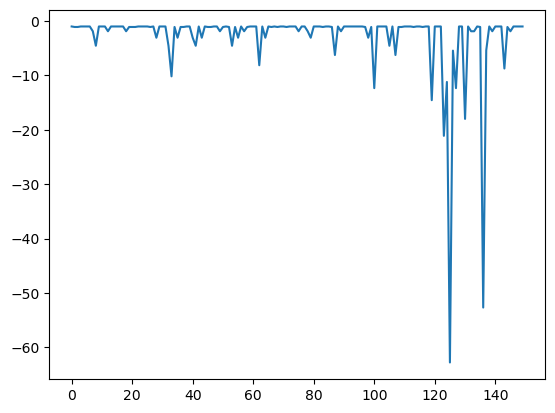

"\nfig, ax = plt.subplots(figsize=(8, 6))\nax.hist(data, bins=30,\n        histtype='step', lw=2,\n        label='Observed data')\nax.hist(ppc_trace['like'], bins=30, \n        histtype='step', lw=2,\n        label='Posterior predictive distribution')\nax.legend(loc=1)\nplt.show()\n"

In [16]:
data1=np.random.lognormal(mean=0.,sigma=1., size=100)
data2=np.random.lognormal(mean=0.,sigma=2., size=50)
data=np.concatenate(([ int(x) for x in data1 ], [ int(x) for x in data2 ]))

num_samples = 1

with pm.Model() as model:
    lam1 = pm.Exponential('lam1', lam=1)
    lam2 = pm.Exponential('lam2', lam=1)
    pois1 = pm.Poisson.dist(mu=lam1)
    pois2 = pm.Poisson.dist(mu=lam2)
    w = pm.Dirichlet('w', a=np.array([1, 1]))
    like = pm.Mixture('like', w=w, comp_dists=[pois1, pois2], observed=data)

with model:
    trace = pm.sample(num_samples, n_init=10000, tune=10000)
with model:
    ppc_trace = pm.sample_posterior_predictive(trace, 1)

pm_data = az.from_pymc3(trace)
print(pm_data.log_likelihood.like[0][0])
print(trace)
#sns.lineplot(data=trace)
sns.lineplot(data=pm_data.log_likelihood.like[0][0])
plt.show()

'''
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(data, bins=30,
        histtype='step', lw=2,
        label='Observed data')
ax.hist(ppc_trace['like'], bins=30, 
        histtype='step', lw=2,
        label='Posterior predictive distribution')
ax.legend(loc=1)
plt.show()
'''